In [20]:
import pandas as pd
import matplotlib.pyplot as plot

# file is taken from Kaggle data set:
# https://www.kaggle.com/mlg-ulb/creditcardfraud
original_data = pd.read_csv('creditcard_small_version.csv')

temp = original_data.copy()

temp.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,52627.000000,52627.000000,52627.000000,52627.000000,52627.000000,52627.000000,52627.000000,52627.000000,52627.000000,52627.000000,...,52627.000000,52627.000000,52627.000000,52627.000000,52627.000000,52627.000000,52627.000000,52627.000000,52627.000000,52627.000000
mean,94787.755848,-0.000287,0.003718,0.004828,0.004781,0.004763,-0.001885,-0.001298,-0.004160,0.001515,...,-0.000585,-0.000241,0.000443,-0.000216,0.003336,0.003705,0.000162,0.003081,87.421519,0.001843
std,47457.975237,1.945827,1.636096,1.489950,1.413174,1.351135,1.321445,1.199170,1.195786,1.102643,...,0.732290,0.725989,0.632782,0.607402,0.522049,0.482781,0.396989,0.360554,235.792638,0.042893
min,2.000000,-56.407510,-72.715728,-31.813586,-5.263068,-32.092129,-26.160506,-31.197329,-38.751525,-9.462573,...,-18.458144,-8.527145,-36.666000,-2.836627,-7.495741,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54136.000000,-0.923518,-0.598175,-0.890138,-0.845128,-0.686196,-0.764543,-0.553360,-0.209826,-0.640335,...,-0.230295,-0.546569,-0.161974,-0.355958,-0.315415,-0.325680,-0.070190,-0.053237,5.510000,0.000000
50%,84767.000000,0.018045,0.070778,0.176475,-0.021414,-0.052737,-0.271074,0.042621,0.020416,-0.052607,...,-0.027966,0.005640,-0.010820,0.040706,0.020239,-0.046219,0.001736,0.011623,21.890000,0.000000
75%,139365.500000,1.314455,0.807595,1.030622,0.734125,0.614667,0.398376,0.572649,0.328436,0.592339,...,0.186629,0.532228,0.145787,0.439575,0.352417,0.246438,0.092753,0.078972,75.990000,0.000000
max,172792.000000,2.439207,17.418649,9.382558,16.491217,34.801666,21.393069,34.303177,17.941363,15.594995,...,22.588989,7.057496,22.528412,4.022866,5.376595,3.463246,5.236482,33.847808,11898.090000,1.000000


In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print("done")

done


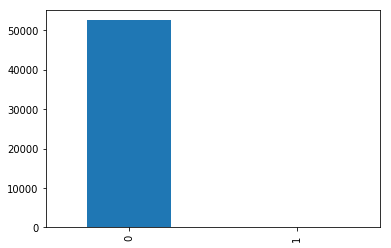

In [22]:
count_classes = pd.value_counts(temp['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')

In [23]:
# creates a list of features that doesn't include the target
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# creates a list with the single item of 'Class', which is the target for this regression
target = 'Class'

# creates to new data frames, one with all the predicting data, and the other with the target
X = temp[features]
y = temp[target]

print("done")

done


In [24]:
# normalizes the data, usually benefits the prediction

def normalize(X):
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X
  
print("done")

done


In [25]:
# creates a model object for us to use
model = LogisticRegression()

# creates a splitter object for us to use
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# a coding loop to split the data, uses the splitter object
for train_indices, test_indices in splitter.split(X, y):
    # we split the data finally
    X_train, y_train = X.loc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.loc[test_indices], y.iloc[test_indices]
    
    # makes use of the normalize function we built
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # makes use of the model object
    # finally fits the model and creates a prediction
    # fit and predict are functions of our model object (i.e., they are built in)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
print("done")

c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


done


In [26]:
# let's see how well the model worked
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26265
           1       0.83      0.59      0.69        49

    accuracy                           1.00     26314
   macro avg       0.91      0.80      0.84     26314
weighted avg       1.00      1.00      1.00     26314



In [0]:
# Notice that the smaller sample of the original data set has a lower precesion for fraud detection
# 18 mb worth of data = precision of .83
# 147 mb of data = precision of .88

In [0]:
# end code